In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import nelpy as nel
from reactivation import AssemblyReact, load_cell_metrics, load_epochs, load_ripples_events, load_SleepState_states, load_spikes, event_triggered_average_fast, plot_events

### Activation Strength A013_day7

In [4]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day7'

assembly_react_A013_day7 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [7]:
assembly_react_A013_day7.load_data()
assembly_react_A013_day7

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 30 units> of length 3:17:28:083 hours

In [8]:
assembly_react_A013_day7.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,2367.133333
1,habituation_arena,2367.133333,2704.833333
2,rest_hab_post,2704.833333,4525.050000
3,habituation_cage,4525.050000,4803.033333
4,rest_pre,4803.033333,5598.166667
5,2novel_exposure,5598.166667,5954.583333
6,exposure_reversed,5954.583333,6203.716667
7,rest_post2,6203.716667,10313.616667
8,1novel_exposure,10313.616667,10692.500000
9,rest_post1,10692.500000,11848.083333


In [11]:
assembly_react_A013_day7.epoch_df.iloc[5]

Cage_or_Maze    2novel_exposure
Start_Time          5598.166667
End_Time            5954.583333
Name: 5, dtype: object

In [13]:
state_dict_A013_day7 = load_SleepState_states(project_path, mice_name)

wake_epochs = nel.EpochArray(
    state_dict_A013_day7["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day7["NREMepisode"],
)

rem_epochs = nel.EpochArray(
    state_dict_A013_day7["REMepisode"],
)

In [15]:
events = []
events.append(nrem_epochs)
events.append(wake_epochs)
events.append(rem_epochs)

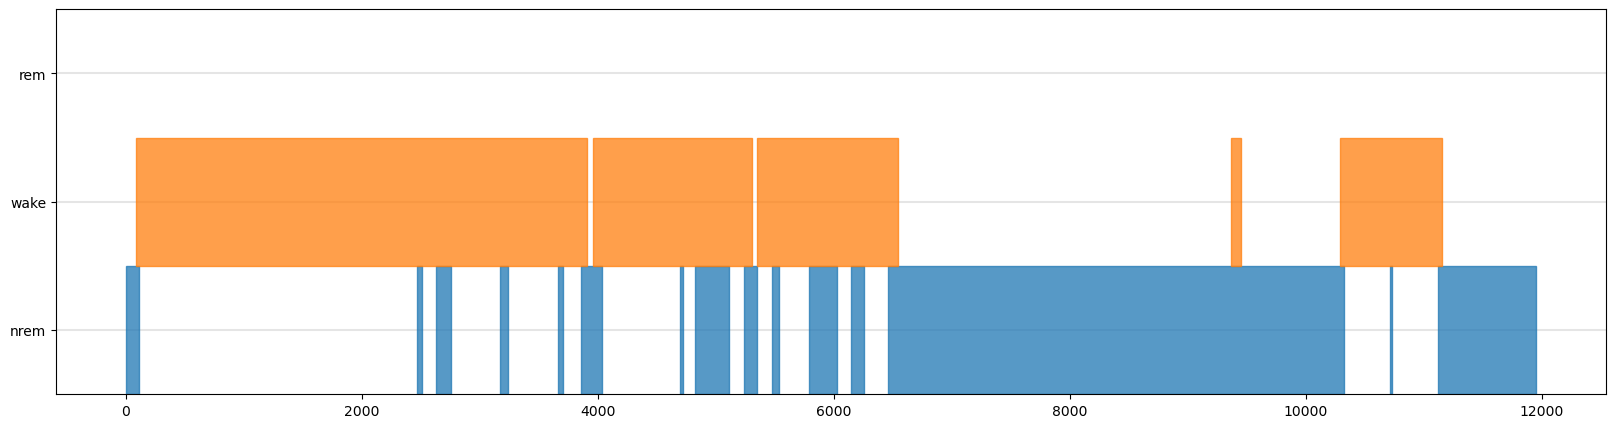

In [17]:
plt.figure(figsize=(20,5))
plot_events(events,['nrem','wake','rem'])

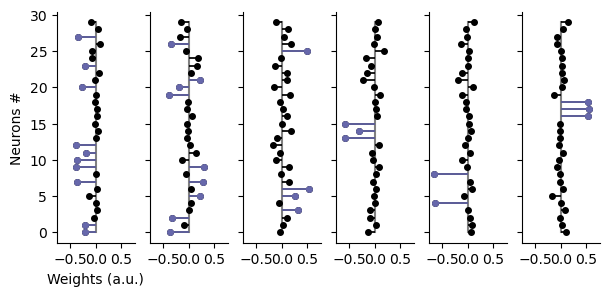

In [19]:
assembly_react_A013_day7.get_weights(epoch= assembly_react_A013_day7.epochs[5] & wake_epochs)
assembly_react_A013_day7.plot()
plt.show()

In [20]:
assembly_act_preSocial_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[4] & nrem_epochs) 
assembly_act_TaskSocial_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[5] & nrem_epochs)
assembly_act_postSocial_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[7] & nrem_epochs)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [23]:
act_pre_sleep_above_A013_day7 = np.where(assembly_act_preSocial_A013_day7.data[:] > 5, assembly_act_preSocial_A013_day7.data[:], 0)
act_post_sleep_above_A013_day7 = np.where(assembly_act_postSocial_A013_day7.data[:] > 5, assembly_act_postSocial_A013_day7.data[:], 0)
act_task_above_A013_day7 = np.where(assembly_act_TaskSocial_A013_day7.data[:] > 5, assembly_act_TaskSocial_A013_day7.data[:], 0)

In [25]:
Act_taskSocial_Joint = act_task_above_A013_day7
Act_taskSocial_Joint = Act_taskSocial_Joint[0:3]

In [27]:
Act_preSocial_Joint = act_pre_sleep_above_A013_day7
Act_preSocial_Joint = Act_preSocial_Joint[0:3]

In [29]:
Act_postSocial_Joint = act_post_sleep_above_A013_day7
Act_postSocial_Joint = Act_postSocial_Joint[0:3]

In [31]:
Act_taskSocial_CA2 = act_task_above_A013_day7[3:]
Act_preSocial_CA2 = act_pre_sleep_above_A013_day7[3:]
Act_postSocial_CA2 = act_post_sleep_above_A013_day7[3:]

Text(0.5, 1.0, 'Post Sleep')

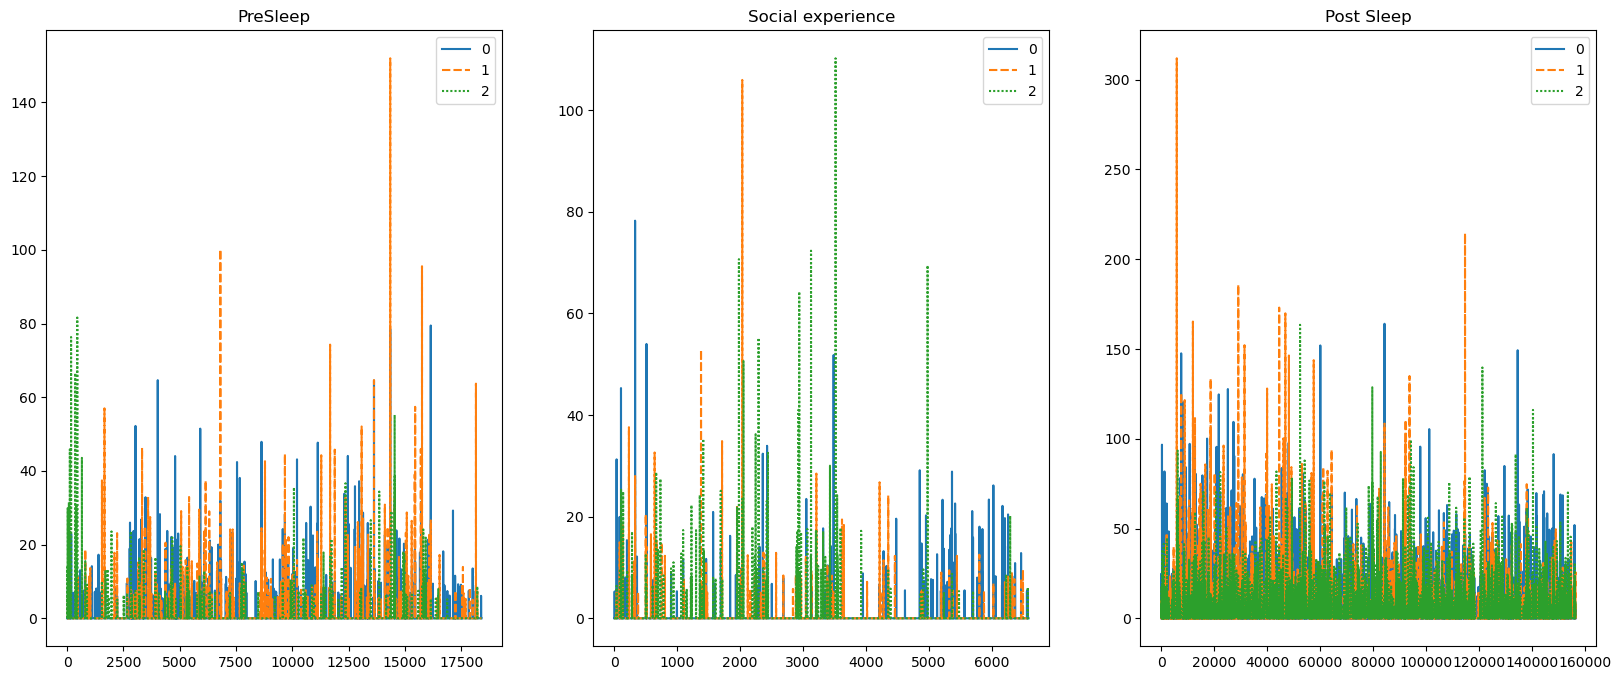

In [31]:
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.lineplot(Act_preSocial_Joint.T)
plt.title("PreSleep")

plt.subplot(1, 3, 2)
sns.lineplot(Act_taskSocial_Joint.T)
plt.title("Social experience")

plt.subplot(1, 3, 3)
sns.lineplot(Act_postSocial_Joint.T)
plt.title("Post Sleep")

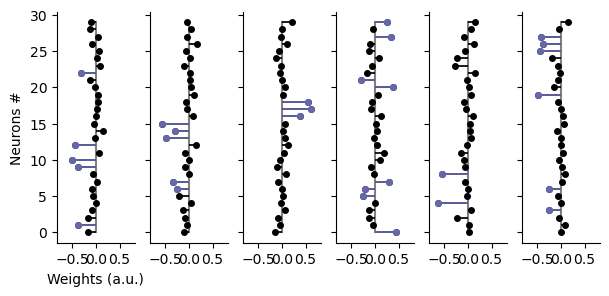

In [33]:
assembly_react_A013_day7.get_weights(epoch= assembly_react_A013_day7.epochs[3] & wake_epochs)
assembly_react_A013_day7.plot()
plt.show()

In [35]:
assembly_act_preobject_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[2] & nrem_epochs) 
assembly_act_Taskobject_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[3] & nrem_epochs)
assembly_act_postobject_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[4] & nrem_epochs)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [37]:
assembly_act_preobject_A013_day7 = np.where(assembly_act_preobject_A013_day7.data[:] > 5, assembly_act_preobject_A013_day7.data[:], 0)
assembly_act_Taskobject_A013_day7 = np.where(assembly_act_Taskobject_A013_day7.data[:] > 5, assembly_act_Taskobject_A013_day7.data[:], 0)
assembly_act_postobject_A013_day7 = np.where(assembly_act_postobject_A013_day7.data[:] > 5, assembly_act_postobject_A013_day7.data[:], 0)

In [39]:
Act_prenonSocial_Joint = assembly_act_preobject_A013_day7
Act_prenonSocial_Joint = Act_prenonSocial_Joint[[0,3,5]]

Act_tasknonSocial_Joint = assembly_act_Taskobject_A013_day7
Act_tasknonSocial_Joint = Act_tasknonSocial_Joint[[0,3,5]]

Act_postnonSocial_Joint = assembly_act_postobject_A013_day7
Act_postnonSocial_Joint = Act_postnonSocial_Joint[[0,3,5]]

In [41]:
Act_prenonSocial_CA2 = assembly_act_preobject_A013_day7[[1,2,4]]
Act_tasknonSocial_CA2 = assembly_act_Taskobject_A013_day7[[1,2,4]]
Act_postnonSocial_CA2 = assembly_act_postobject_A013_day7[[1,2,4]]

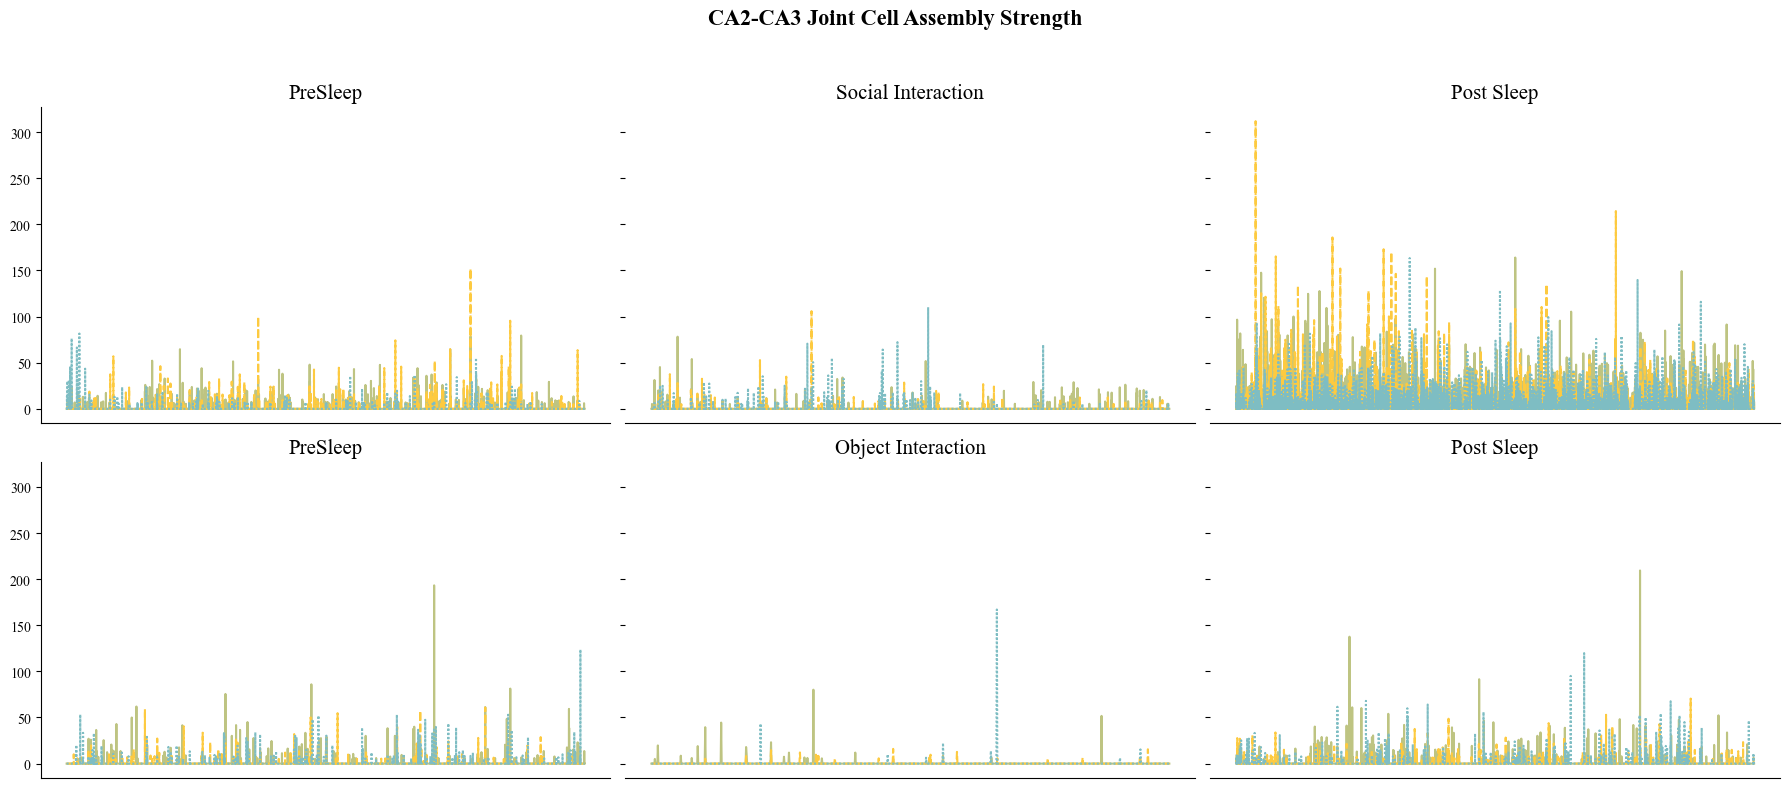

In [47]:

fig, axs = plt.subplots(2, 3, figsize=(18, 8), sharey=True)
plt.rcParams['font.family'] = 'Times New Roman'
# List of datasets and titles for easy looping
datasets = [
    (Act_preSocial_Joint, "PreSleep"),
    (Act_taskSocial_Joint, "Social Interaction"),
    (Act_postSocial_Joint, "Post Sleep"),
    (Act_prenonSocial_Joint, "PreSleep"),
    (Act_tasknonSocial_Joint, "Object Interaction"),
    (Act_postnonSocial_Joint, "Post Sleep")
]

# Custom color palette
palette = ["#BEC482", "#FDCA40","#7EBDC3"]

for i, (ax, (data, title)) in enumerate(zip(axs.flat, datasets), start=1):
    sns.lineplot(data.T, ax=ax, palette=palette, legend = False)
    ax.set_title(title, fontsize=15)
    ax.grid(False)  # Optional: Add grid for better readability
    ax.set_xticks([])  
    ax.set_xlabel('')  


    # Remove right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Remove left spine for plots 2, 3, 5, and 6
    if i in [2, 3, 5, 6]:
        ax.spines['left'].set_visible(False)
fig.suptitle("CA2-CA3 Joint Cell Assembly Strength", fontsize=16, fontweight='bold')
# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

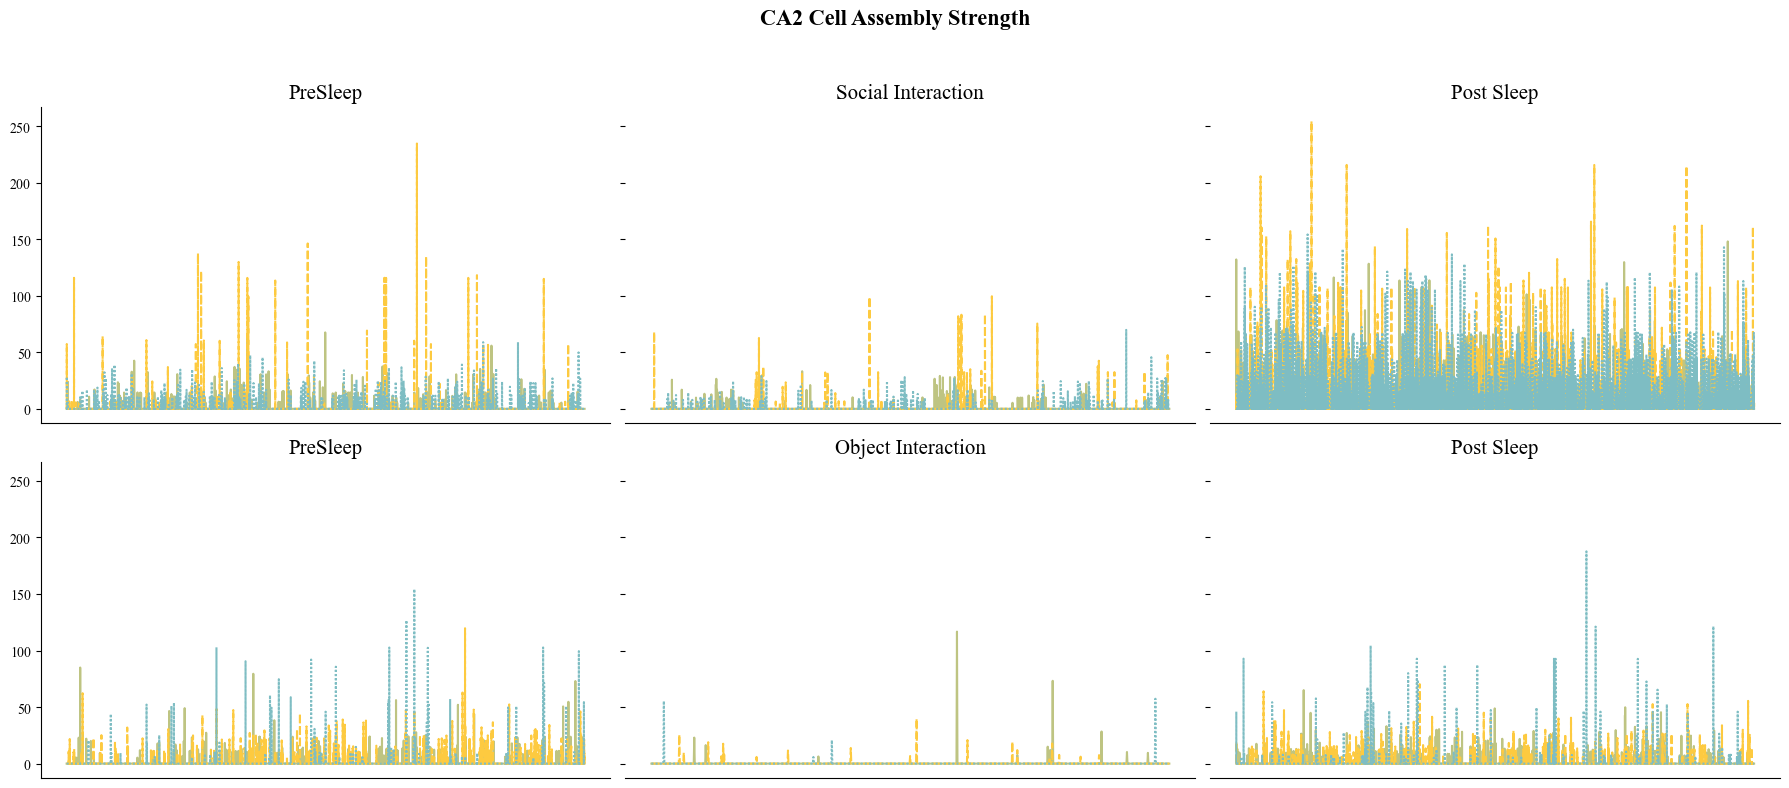

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8), sharey=True)
plt.rcParams['font.family'] = 'Times New Roman'
# List of datasets and titles for easy looping
datasets = [
    (Act_preSocial_CA2, "PreSleep"),
    (Act_taskSocial_CA2, "Social Interaction"),
    (Act_postSocial_CA2, "Post Sleep"),
    (Act_prenonSocial_CA2, "PreSleep"),
    (Act_tasknonSocial_CA2, "Object Interaction"),
    (Act_postnonSocial_CA2, "Post Sleep")
]

# Custom color palette
palette = ["#BEC482", "#FDCA40","#7EBDC3"]

for i, (ax, (data, title)) in enumerate(zip(axs.flat, datasets), start=1):
    sns.lineplot(data.T, ax=ax, palette=palette, legend = False)
    ax.set_title(title, fontsize=15)
    ax.grid(False)  # Optional: Add grid for better readability
    ax.set_xticks([])  
    ax.set_xlabel('')  


    # Remove right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Remove left spine for plots 2, 3, 5, and 6
    if i in [2, 3, 5, 6]:
        ax.spines['left'].set_visible(False)
fig.suptitle("CA2 Cell Assembly Strength", fontsize=16, fontweight='bold')
# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [53]:
len(Act_taskSocial_CA2)

3